## Data Loader

In [5]:
from osdatahub import NGD
from osdatahub.FeaturesAPI import FeaturesAPI
from shapely.geometry import Polygon
from pyproj import Transformer
from osdata_utils.downloader import OSDataDownloader
from osdata_utils.products import PRODUCTS
import geopandas as gpd
import pandas as pd
import mapreader
import rasterio
from rasterio.plot import show
import os

# Load and convert to geotiff

In [6]:
from mapreader import loader

In [7]:
maps = loader("./maps_south_downs/*png")

  0%|          | 0/178 [00:00<?, ?it/s]

In [4]:
print(maps)

#images: 10

#parents: 10
map_101441205.png
map_101433939.png
map_101435751.png
map_101441217.png
map_101440983.png
map_101437696.png
map_101440431.png
map_101434269.png
map_101434323.png
map_101433990.png

#patches: 0



In [8]:
maps.add_metadata("./maps_south_downs/metadata.csv", ignore_mismatch=True)

[INFO] Loading metadata from CSV/TSV/etc file.


In [9]:
maps.check_georeferencing()
if maps.georeferenced:
    print("Georeferencing successfully added.")
else:
    print("Georeferencing is incomplete. Verify metadata.")

Georeferencing successfully added.


In [10]:
print(maps.parents["map_101433939.png"]["coordinates"])
print(maps.parents["map_101433939.png"]["crs"])

(-0.9283447265625, 51.03275840574761, -0.85418701171875, 51.063838646941576)
EPSG:4326


In [11]:
maps_list = maps.list_parents()
maps_list

['map_101436201.png',
 'map_101440770.png',
 'map_101434647.png',
 'map_101435664.png',
 'map_101435169.png',
 'map_101441205.png',
 'map_101435763.png',
 'map_101435124.png',
 'map_101435652.png',
 'map_101433939.png',
 'map_101434296.png',
 'map_101440593.png',
 'map_101437333.png',
 'map_101435790.png',
 'map_101440788.png',
 'map_101440935.png',
 'map_101434707.png',
 'map_101435829.png',
 'map_101441184.png',
 'map_101435847.png',
 'map_101440899.png',
 'map_101434782.png',
 'map_101433978.png',
 'map_101440758.png',
 'map_101435196.png',
 'map_101441259.png',
 'map_101435223.png',
 'map_101436168.png',
 'map_101435136.png',
 'map_101434302.png',
 'map_101433960.png',
 'map_101435751.png',
 'map_101435481.png',
 'map_101440971.png',
 'map_101434653.png',
 'map_101434236.png',
 'map_101440959.png',
 'map_101434776.png',
 'map_101435595.png',
 'map_101440710.png',
 'map_101440800.png',
 'map_101435796.png',
 'map_101440575.png',
 'map_101441484.png',
 'map_101441211.png',
 'map_1014

In [12]:
dir(maps)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_center_coord_id',
 '_add_coord_increments_id',
 '_add_coords_from_grid_bb_id',
 '_add_geo_info_id',
 '_add_parent_polygons_id',
 '_add_patch_coords_id',
 '_add_patch_polygons_id',
 '_add_patch_to_parent',
 '_add_shape_id',
 '_calc_pixel_height_width',
 '_check_image_mode',
 '_convert_image_path',
 '_get_tree_level',
 '_images_constructor',
 '_infer_parent_coords_from_patches_id',
 '_make_dir',
 '_patchify_by_pixel',
 '_patchify_by_pixel_square',
 '_print_if_verbose',
 '_resolve_file_path',
 '_save_parent_as_geotiff',
 '_save_patch_as_geotiff',
 'add_center_coord',
 'add_coord_increments'

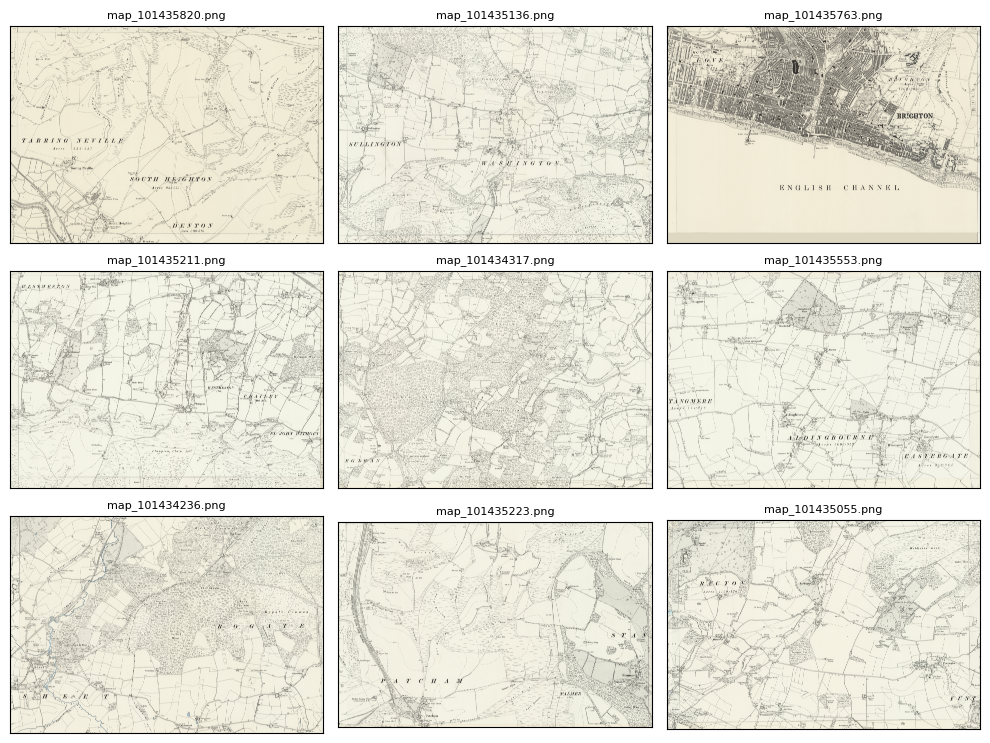

In [13]:
maps.show_sample(tree_level="parent", num_samples=9, figsize=(10, 10))

#### Save as geotiff espg 27700 to work with OS masks

In [14]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)

for parent_id in maps.list_parents():
    coords = maps.parents[parent_id]["coordinates"]
    xmin, ymin, xmax, ymax = coords
    new_coords = transformer.transform_bounds(xmin, ymin, xmax, ymax)
    maps.parents[parent_id]["coordinates"] = new_coords
    maps.parents[parent_id]["crs"] = "EPSG:27700"

In [15]:
print(maps.parents["map_101433939.png"]["coordinates"])
print(maps.parents["map_101433939.png"]["crs"])

(475192.11939070607, 126479.01303338609, 480442.2872536591, 130013.4650072022)
EPSG:27700


In [16]:
# Save parent images as GeoTIFFs with CRS EPSG:27700
maps.save_parents_as_geotiffs(rewrite=True, verbose=True, crs="EPSG:27700")

  0%|          | 0/178 [00:00<?, ?it/s]

[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101436201.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101440770.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101434647.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101435664.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101435169.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101441205.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101435763.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101435124.tif.
[INFO] Creating: /home/david/Documents/GitHub/field-boundaries/notebooks/maps_south_downs/map_101435652.tif.
[INFO] Creating: /h